In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load FINAL merged dataset (rides + weather)
merged_df = pd.read_csv("citibike_2022_daily_with_weather.csv")
merged_df["date"] = pd.to_datetime(merged_df["date"])
merged_df = merged_df.sort_values("date")

merged_df.head(), merged_df.shape

(        date  daily_ride_count  PRCP  TAVG  TMAX  TMIN
 0 2022-01-01             20428  19.3  11.6  13.9  10.0
 1 2022-01-02             43009   1.0  11.4  15.6   3.9
 2 2022-01-03             33189   0.0   1.4   3.9  -4.3
 3 2022-01-04             36842   0.0  -2.7   2.2  -6.0
 4 2022-01-05             34230   6.1   3.2   8.9   0.0,
 (364, 6))

In [2]:
# Step 4 demo: split into rides + weather, then merge again (dataset is already merged)
rides_df = merged_df[["date", "daily_ride_count"]].copy()
weather_df = merged_df[["date", "PRCP", "TAVG", "TMAX", "TMIN"]].copy()

merged_df = pd.merge(rides_df, weather_df, on="date", how="inner")
merged_df.head()

,date,daily_ride_count,PRCP,TAVG,TMAX,TMIN
0,2022-01-01,20428,19.3,11.6,13.9,10.0
1,2022-01-02,43009,1.0,11.4,15.6,3.9
2,2022-01-03,33189,0.0,1.4,3.9,-4.3
3,2022-01-04,36842,0.0,-2.7,2.2,-6.0
4,2022-01-05,34230,6.1,3.2,8.9,0.0


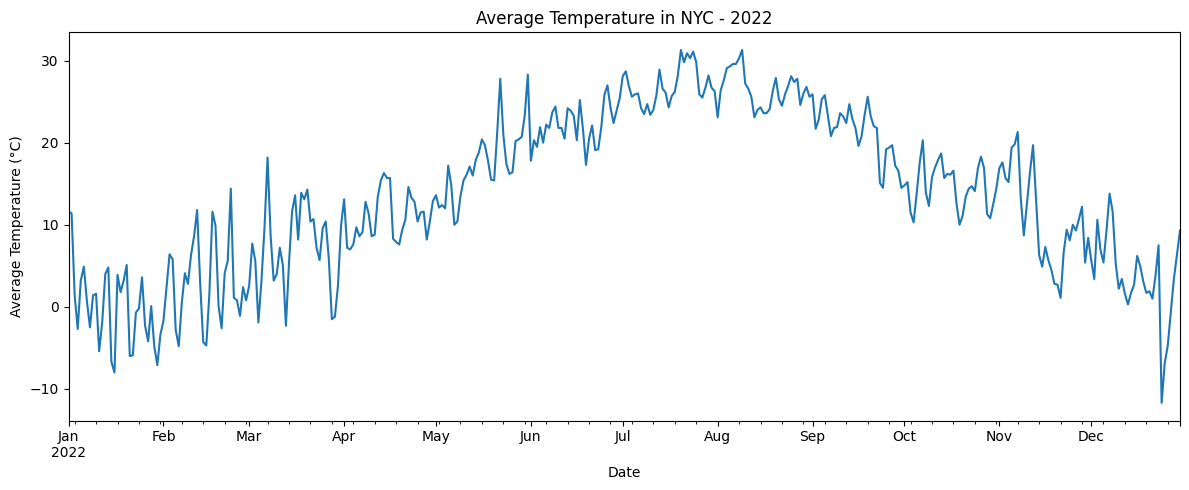

In [3]:
# Line plot of average temperature in 2022 (time series)
merged_df = merged_df.set_index("date")

merged_df["TAVG"].plot(figsize=(12, 5), title="Average Temperature in NYC - 2022")

plt.xlabel("Date")
plt.ylabel("Average Temperature (°C)")
plt.tight_layout()
plt.show()

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

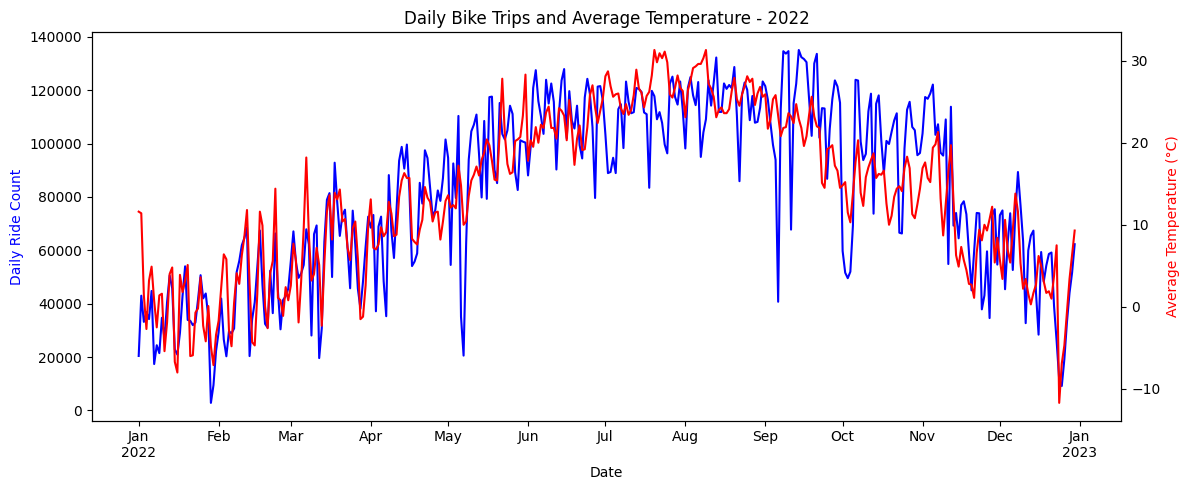

In [5]:
# Dual axis plot: Trips vs Temperature (month labels + year only on January)

import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

fig, ax1 = plt.subplots(figsize=(12, 5))

# First axis (Trips)
ax1.plot(merged_df.index, merged_df["daily_ride_count"], color="blue")
ax1.set_xlabel("Date")
ax1.set_ylabel("Daily Ride Count", color="blue")

# Monthly ticks
ax1.xaxis.set_major_locator(mdates.MonthLocator())

# Custom formatter: show year only under January
def month_with_year_on_jan(x, pos=None):
    d = mdates.num2date(x)
    if d.month == 1:
        return d.strftime("%b\n%Y")   # Jan with year under it
    return d.strftime("%b")          # other months: just month

ax1.xaxis.set_major_formatter(FuncFormatter(month_with_year_on_jan))
plt.setp(ax1.get_xticklabels(), rotation=0, ha="center")

# Second axis (Temperature)
ax2 = ax1.twinx()
ax2.plot(merged_df.index, merged_df["TAVG"], color="red")
ax2.set_ylabel("Average Temperature (°C)", color="red")

plt.title("Daily Bike Trips and Average Temperature - 2022")
plt.tight_layout()
plt.show()

## Explanation of the Visualization Code

In this notebook, I used Matplotlib to create visualizations of temperature and bike trips in 2022.

First, I split the dataset into ride data and weather data and merged them again using `pd.merge()` to clearly demonstrate how both datasets are combined.

For the temperature time series, I used the pandas plotting function (`merged_df["TAVG"].plot()`), which internally uses Matplotlib. This follows the **state-based (pyplot) paradigm**, where Matplotlib manages the current figure and axes automatically.

For the dual-axis plot, I used the **Object-Oriented (OO) paradigm** of Matplotlib. I explicitly created a figure and axes using:

`fig, ax1 = plt.subplots()`

Then I created a second axis using:

`ax1.twinx()`

This allowed me to plot daily bike trips on one axis and average temperature on a second y-axis. The OO approach provides more control over axes, labels, and formatting, which is why it is preferred for more complex visualizations.